## Question 3 

**What happens if you double the diffusivity coefficient?**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
# constants
SECPERDAY = 86400.
M2KM = 1000

In [2]:
# problem parameters
kappa=2.0e3   # Eddy diffusion coefficient [m2 s-1]
dx=500         # X resolution [m]
dt=100         # time step [s]
t0=0.          # initial time
tmax=0.12      # duration of simulation [days]
xmax=10.0e3    # length of the basin [m]

# Parameters of the initial DIN spillage
N0 = 20.       # baseline concentration [mmol/m3]
sigma = 1000.  # width [m]
A = 100.       # amplitude [mmol/m3]

In [3]:
# Spatial shape of the initial DIN concentration
def Gaussian(x):
    y = N0+A*np.exp(-(x/sigma)**2)
    return y

In [4]:
# time axis
NT = int(np.floor(tmax*86400/dt))+1  # number of steps (starts from 0)
# X axis (centred at 0)
x = np.arange(-xmax,xmax,dx)
IM = len(x)             # number of grid points
N = np.zeros([IM,NT])   # the array holding the numerical solution 
print('Grid steps : ',IM)
print('Number of time steps : ',NT)
print('Timestep = ',dt,' s')
print('Max numerical diffusion DX^2/DT = ',dx**2/dt,' m2/s')
print('Physical diffusion = ',kappa,' m2/s')
print('Courant number (diffusion) = ',kappa*dt/(dx**2))

Grid steps :  40
Number of time steps :  104
Timestep =  100  s
Max numerical diffusion DX^2/DT =  2500.0  m2/s
Physical diffusion =  2000.0  m2/s
Courant number (diffusion) =  0.8


In [5]:
# Compute the numerical solution using a time loop over the number of time steps
N[:,0] = Gaussian(x)    # initial condition

for n in range(NT-1):
    # Question 2
    N[0,n+1]  = N[1,n]
    N[-1,n+1] = N[-2,n]
    # discretization of the second derivative
    rhs = kappa*(N[:-2,n]-2*N[1:-1,n]+N[2:,n])/(dx**2)
    N[1:-1,n+1] = N[1:-1,n] + rhs*dt  

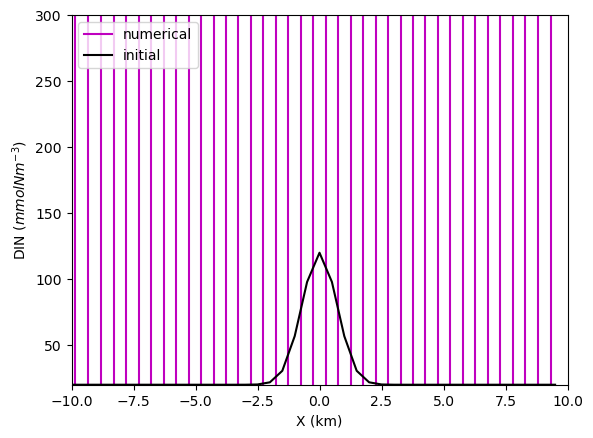

In [9]:
fig, ax = plt.subplots()
# set the axis limits
plt.axis([-xmax/M2KM, xmax/M2KM, N0-5, N0+A+10])
# Adjust the y-limits
ax.set_ylim(20, 300)

# first plot the initial condition and set the line attributes
sol, = ax.plot(x/M2KM, N[:,0],'m',label='numerical')
line, = ax.plot(x/M2KM, Gaussian(x),'k',label='initial')
ax.set_xlabel('X (km)')
ax.set_ylabel('DIN ($mmol N m^{-3}$)')
plt.legend(loc='upper left')

def animate(i):
    sol.set_ydata(N[:,i])  # update the numerical solution
    return sol,

# create the animation and loop (interval is in ms)
ani = animation.FuncAnimation(
    fig, animate, interval=dt, blit=True, frames=NT, repeat=True)

# display the animation as a javascript object embedded in the notebook
from IPython.display import HTML
HTML(ani.to_jshtml())

When you double the diffusion coefficient, diffusion occurs at a much faster rate. This turbulence leads to mixing as diffusion occurs. The gradients break down as mixing occurs until the whole basin has bands of constant temperature. Instead of the peak flattening with time, the peak increases suddenly even as the nitrogen concentration spreads across the basin. The plot is focussing on the turbulence instead of the overall main diffusion pattern.

**How would you fix this?**

I would increase the spatial step dx. This smooths any noise that may arise from the turbulence and allows us to see the "big picture" in terms of the diffusion flow. The same results can be obtained by reducing the timestep dt as the turbulence causes rapid changes in a short timespan, meaning that more gridpoints are needed to obtain the overall main diffusion flow.